In [1]:
from datetime import datetime, timedelta
import itertools
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import time
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter, defaultdict
import seaborn as sns
import re
import math
from datetime import datetime

### load data

In [2]:
data = pd.read_csv("./data/clean/cleanData.csv")
print data.shape

(49550, 21)


In [3]:
data.built = 2017 - data.built
data.Lastremodel = 2017 - data.Lastremodel
data.head()

,city,zipcode,area,bed,bath,sqft,price,Zestimate,type,built,Lastremodel,year1,price1,year2,price2,year3,price3,year4,price4,year5,price5
0,Fremont,94555.0,Northgate,4.0,1.0,1400.0,140000.0,986436.0,Single Family,47.0,47.0,1999-06-01,292000.0,NaN,140000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Fremont,94538.0,Downtown,2.0,2.0,1042.0,160000.0,535006.0,Condo,45.0,45.0,NaN,225000.0,2017-04-28,160000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Fremont,94539.0,Mission Valley,3.0,2.0,1434.0,130000.0,1320951.0,Single Family,56.0,55.0,2017-04-25,130000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fremont,94538.0,Sundale,3.0,1.0,948.0,141500.0,668271.0,Single Family,58.0,56.0,2000-06-26,329000.0,2017-04-21,141500.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Fremont,94538.0,Blacow,2.0,2.5,1157.0,60000.0,710981.0,Condo,23.0,23.0,1995-02-17,173000.0,2000-02-29,244500.0,2015-07-21,605000.0,2017-03-31,60000.0,NaN,NaN


### which y to use?

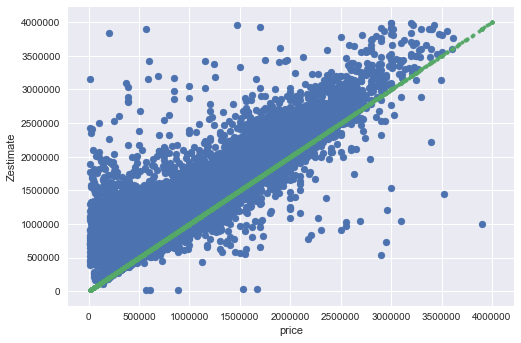

In [4]:
plt.scatter(x=data.price, y=data.Zestimate)
plt.xlabel("price")
plt.ylabel("Zestimate")
plt.scatter(x=data.price, y=data.price, marker=".")

### remove columns

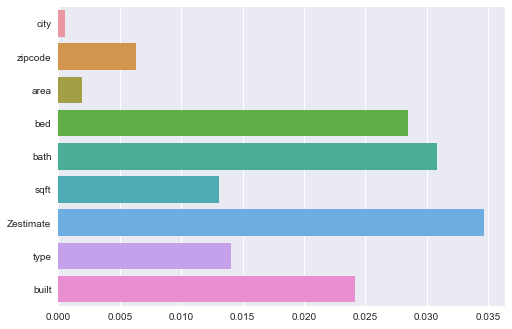

In [5]:
use_columns = ["city","zipcode","area","bed","bath","sqft","Zestimate","type","built"]
data = data.loc[:, use_columns]
sns.barplot(y=data.isnull().sum().index, x=data.isnull().sum().values*1.0/data.shape[0])

### remove rows

In [6]:
print data.shape
ind = data.isnull().sum(1) == 0
data = data.loc[ind, :]
print data.shape

(49550, 9)
(45870, 9)


### convert to DF

In [7]:
data.head()

,city,zipcode,area,bed,bath,sqft,Zestimate,type,built
0,Fremont,94555.0,Northgate,4.0,1.0,1400.0,986436.0,Single Family,47.0
1,Fremont,94538.0,Downtown,2.0,2.0,1042.0,535006.0,Condo,45.0
2,Fremont,94539.0,Mission Valley,3.0,2.0,1434.0,1320951.0,Single Family,56.0
3,Fremont,94538.0,Sundale,3.0,1.0,948.0,668271.0,Single Family,58.0
4,Fremont,94538.0,Blacow,2.0,2.5,1157.0,710981.0,Condo,23.0


In [8]:
cate_df = data.loc[:, ["city", "zipcode", "area", "bet", "bath", "type"]]
cont_df = data.loc[:, ["sqft", "Zestimate", "built"]]

cate_df = cate_df.astype("str")

In [9]:
dummy_df = pd.get_dummies(cate_df)
print dummy_df.shape

(45870, 206)


In [10]:
df_full = pd.concat([cont_df, dummy_df], axis=1)
print df_full.shape
df_full.head()

(45870, 209)


,sqft,Zestimate,built,city_Fremont,city_Mountain View,city_Newark,city_Redwood City,city_San Jose,city_San Mateo,city_Santa Clara,city_Sunnyvale,city_Union City,zipcode_94040.0,zipcode_94041.0,zipcode_94043.0,zipcode_94061.0,zipcode_94062.0,zipcode_94063.0,zipcode_94065.0,zipcode_94085.0,zipcode_94086.0,zipcode_94087.0,zipcode_94089.0,zipcode_94401.0,zipcode_94402.0,zipcode_94403.0,zipcode_94404.0,zipcode_94536.0,zipcode_94538.0,zipcode_94539.0,zipcode_94555.0,zipcode_94560.0,zipcode_94587.0,zipcode_95050.0,zipcode_95051.0,zipcode_95054.0,zipcode_95110.0,zipcode_95111.0,zipcode_95112.0,zipcode_95113.0,zipcode_95116.0,zipcode_95117.0,zipcode_95118.0,zipcode_95119.0,zipcode_95120.0,zipcode_95121.0,zipcode_95122.0,zipcode_95123.0,zipcode_95124.0,zipcode_95125.0,zipcode_95126.0,zipcode_95127.0,zipcode_95128.0,zipcode_95129.0,zipcode_95130.0,zipcode_95131.0,zipcode_95132.0,zipcode_95133.0,zipcode_95134.0,zipcode_95135.0,zipcode_95136.0,zipcode_95138.0,zipcode_95139.0,zipcode_95148.0,area_28 Palms,area_94040,area_94041,area_94043,area_94062,area_94560,area_94587,area_95050,area_95051,area_95054,area_Almaden Valley,area_Alum Rock-East Foothills,area_Ampex,area_Aragon,area_Ardenwood,area_Arlington,area_Bay Meadows,area_Baywood,area_Baywood Knolls,area_Baywood Park,area_Berryessa,area_Blacow,area_Blossom Valley,area_Brookvale,area_Cabrillo,area_Cambrian Park,area_Cameron Hills,area_Canyon,area_Canyon Heights,area_Centennial,area_Centerville,area_Central,area_Central Business District,area_Cherry-Guardino,area_College Heights,area_Country Club Heights,area_Cuesta Park,area_De Anza,area_Dolphin,area_Downtown,area_Eagle Hill,area_East Industrial,area_East Murphy,area_East San Jose,area_East San Mateo,area_Eastern Varsity Park,area_Edenvale - Seven Trees,area_Edgewater Isle,area_Evergreen,area_Fairgrounds,area_Farm Hill,area_Fiesta Gardens,area_Foothill Terrace,area_Friendly Acres,area_Gemello Park,area_Glenmoor,area_Greater San Antonio,area_Grimmer,area_Hayward Park,area_Irvington,area_Kimber-Gomes,area_Lakes and Birds,area_Lakewood,area_Laurelwood,area_Lauriedale,area_Lido,area_Los Prados,area_Marina Park,area_Mariners Island,area_Marlin,area_Martens-Carmelita,area_Middlefield,area_Mission Hills,area_Mission San Jose,area_Mission Valley,area_Moffett Boulevard,area_Monta Loma,area_Niles,area_Nineteenth Avenue,area_North Central,area_North San Jose,area_North Shoreview,area_North Valley,area_North Wishman,area_Northeast Hillsdale,area_Northgate,area_Northwest Hillsdale,area_Oakwood,area_Old Mountain View,area_Ortega,area_Palm,area_Parkmont,area_Parkside,area_Ponderosa,area_Raynor,area_Rex Manor,area_Roosevelt,area_Rose Garden,area_Saint Francis Acres,area_San Mateo Heights,area_San Mateo Park,area_San Mateo Village,area_Santa Teresa,area_Sequoia,area_Serra,area_Shearwater,area_Shoreline West,area_Slater,area_South Shoreview,area_South Sundale,area_Southeast Hillsdale,area_Southwest Hillsdale,area_Spring Meadows,area_Steinberger,area_Sundale,area_Sunnybrae,area_Sylvan Park,area_Twenty-Fifth Ave,area_Vineyards-Avalon,area_Wagon Wheel,area_Warm Springs,area_Washington,area_Waverly Park,area_Weibel,area_West Murphy,area_West San Jose,area_Westport,area_Westshore,area_Willow Glen,area_Woodside Plaza,bet_nan,bath_1.0,bath_1.5,bath_2.0,bath_2.5,bath_3.0,bath_3.5,bath_4.0,bath_4.5,bath_5.0,type_Condo,type_Mobile / Manufactured,type_Multi Family,type_Single Family,type_Townhouse
0,1400.0,986436.0,47.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1042.0,535006.0,45.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### model

In [11]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [12]:
X = df_full.drop("Zestimate", 1)
y = df_full.Zestimate
print X.shape
print y.shape

(45870, 208)
(45870,)


0
1
2
3
4
5
6
7
8
9


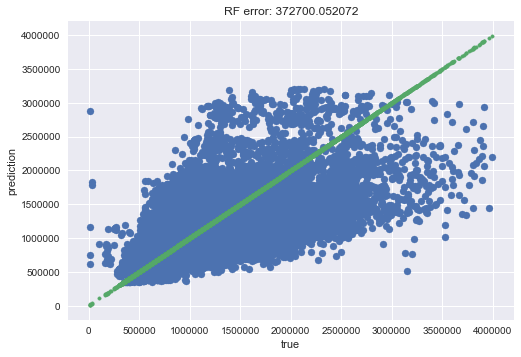

In [13]:
rep = 10
mat = []
ip = np.zeros(X.shape[1])

for i in xrange(rep):
    RF = RandomForestRegressor()
    pred = cross_val_predict(RF, X, y, cv=5)
    mat.append(pred)
    RF.fit(X, y)
    ip += RF.feature_importances_
    print i
    
preds = np.array(mat).mean(0)
err = np.sqrt(mean_squared_error(y_pred=preds, y_true=y))
plt.scatter(x=y, y=preds)
plt.scatter(x=y, y=y, marker=".")
plt.xlabel("true")
plt.ylabel("prediction")
plt.title("RF error: " + str(err))

In [14]:
ipdf = pd.DataFrame(zip(X.columns, ip), columns=["feature", "importance"]).sort_values("importance", ascending=False)
ipdf.head(20)

,feature,importance
0,sqft,5.035661
1,built,0.886621
3,city_Mountain View,0.575613
6,city_San Jose,0.414703
20,zipcode_94087.0,0.293658
206,type_Single Family,0.240179
5,city_Redwood City,0.230413
52,zipcode_95129.0,0.191835
7,city_San Mateo,0.172116
9,city_Sunnyvale,0.156342


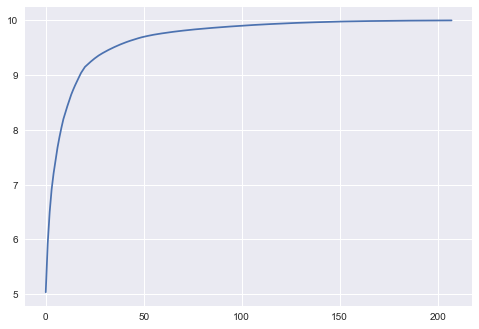

In [15]:
plt.plot(np.cumsum(sorted(ipdf.importance, reverse=True)))

In [16]:
top_features = ipdf.feature[:20]
X = X.loc[:, top_features]
y = df_full.Zestimate
print X.shape
print y.shape

(45870, 20)
(45870,)


0
1
2
3
4
5
6
7
8
9


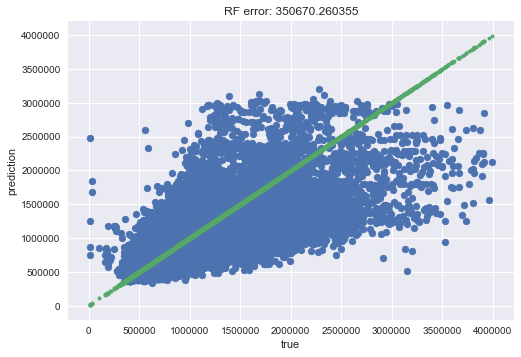

In [17]:
rep = 10
mat = []
ip = np.zeros(X.shape[1])

for i in xrange(rep):
    RF = RandomForestRegressor()
    pred = cross_val_predict(RF, X, y, cv=5)
    mat.append(pred)
    RF.fit(X, y)
    ip += RF.feature_importances_
    print i
    
preds = np.array(mat).mean(0)
err = np.sqrt(mean_squared_error(y_pred=preds, y_true=y))
plt.scatter(x=y, y=preds)
plt.scatter(x=y, y=y, marker=".")
plt.xlabel("true")
plt.ylabel("prediction")
plt.title("RF error: " + str(err))

In [18]:
pd.DataFrame(zip(X.columns, ip), columns=["feature", "importance"]).sort_values("importance", ascending=False).head(20)

,feature,importance
0,sqft,5.344135
1,built,1.106410
2,city_Mountain View,0.596193
3,city_San Jose,0.425648
4,zipcode_94087.0,0.303222
5,type_Single Family,0.290352
6,city_Redwood City,0.254234
7,zipcode_95129.0,0.195000
8,city_San Mateo,0.192148
9,city_Sunnyvale,0.179715


### visualization

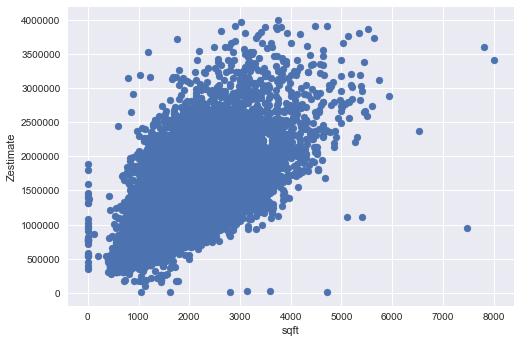

In [19]:
plt.scatter(x=data.sqft, y=data.Zestimate)
plt.xlabel("sqft")
plt.ylabel("Zestimate")

(array([ -500000.,        0.,   500000.,  1000000.,  1500000.,  2000000.,
         2500000.,  3000000.,  3500000.,  4000000.,  4500000.]),
 <a list of 11 Text yticklabel objects>)

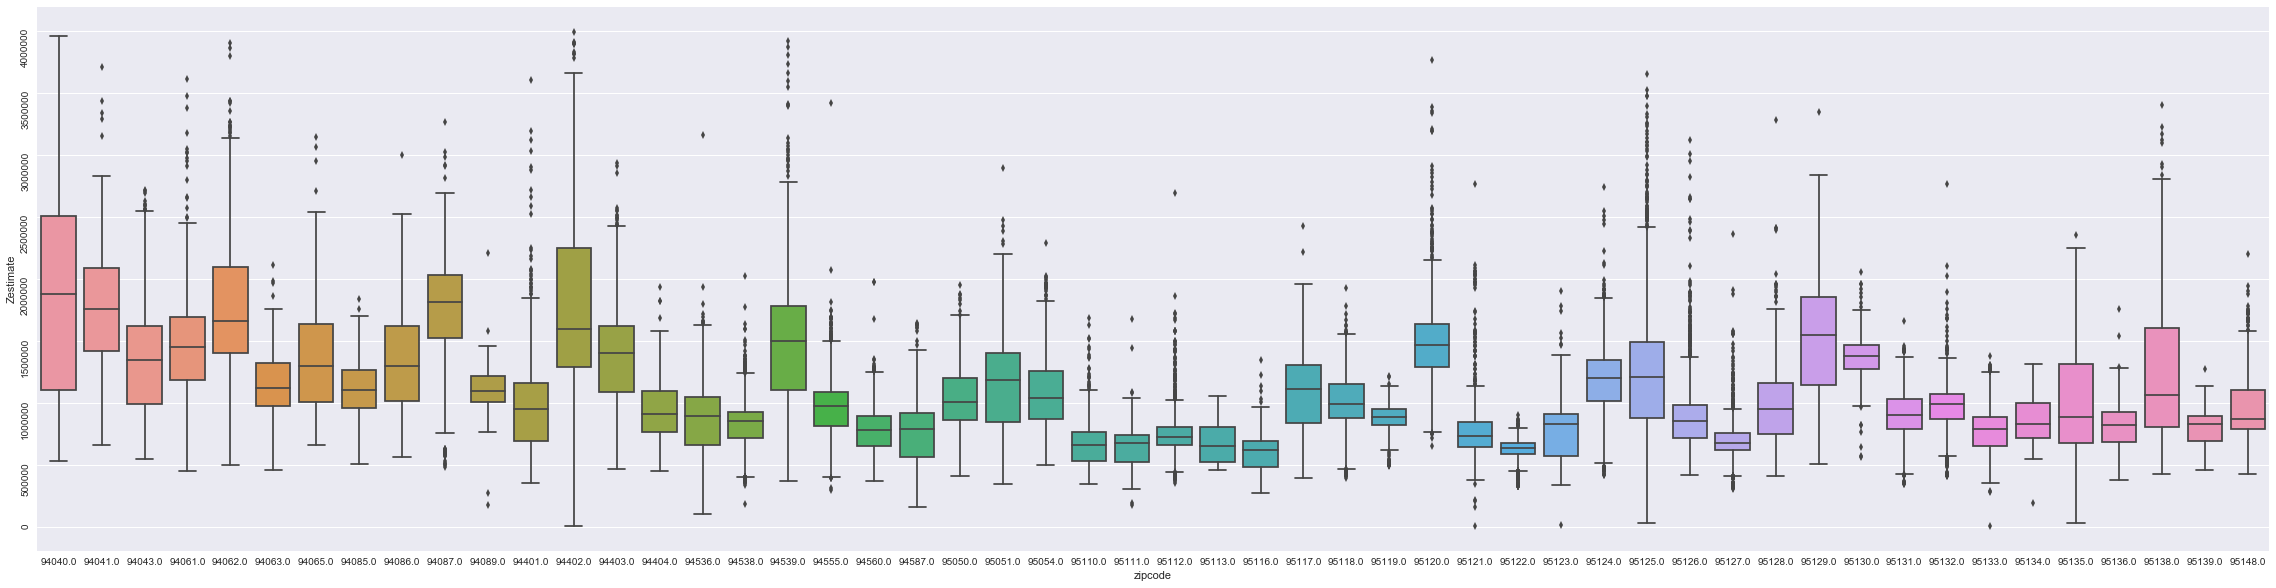

In [20]:
plt.figure(figsize=(40,10))
sns.boxplot(x=data.zipcode, y=data.Zestimate)
plt.yticks(rotation=90) 

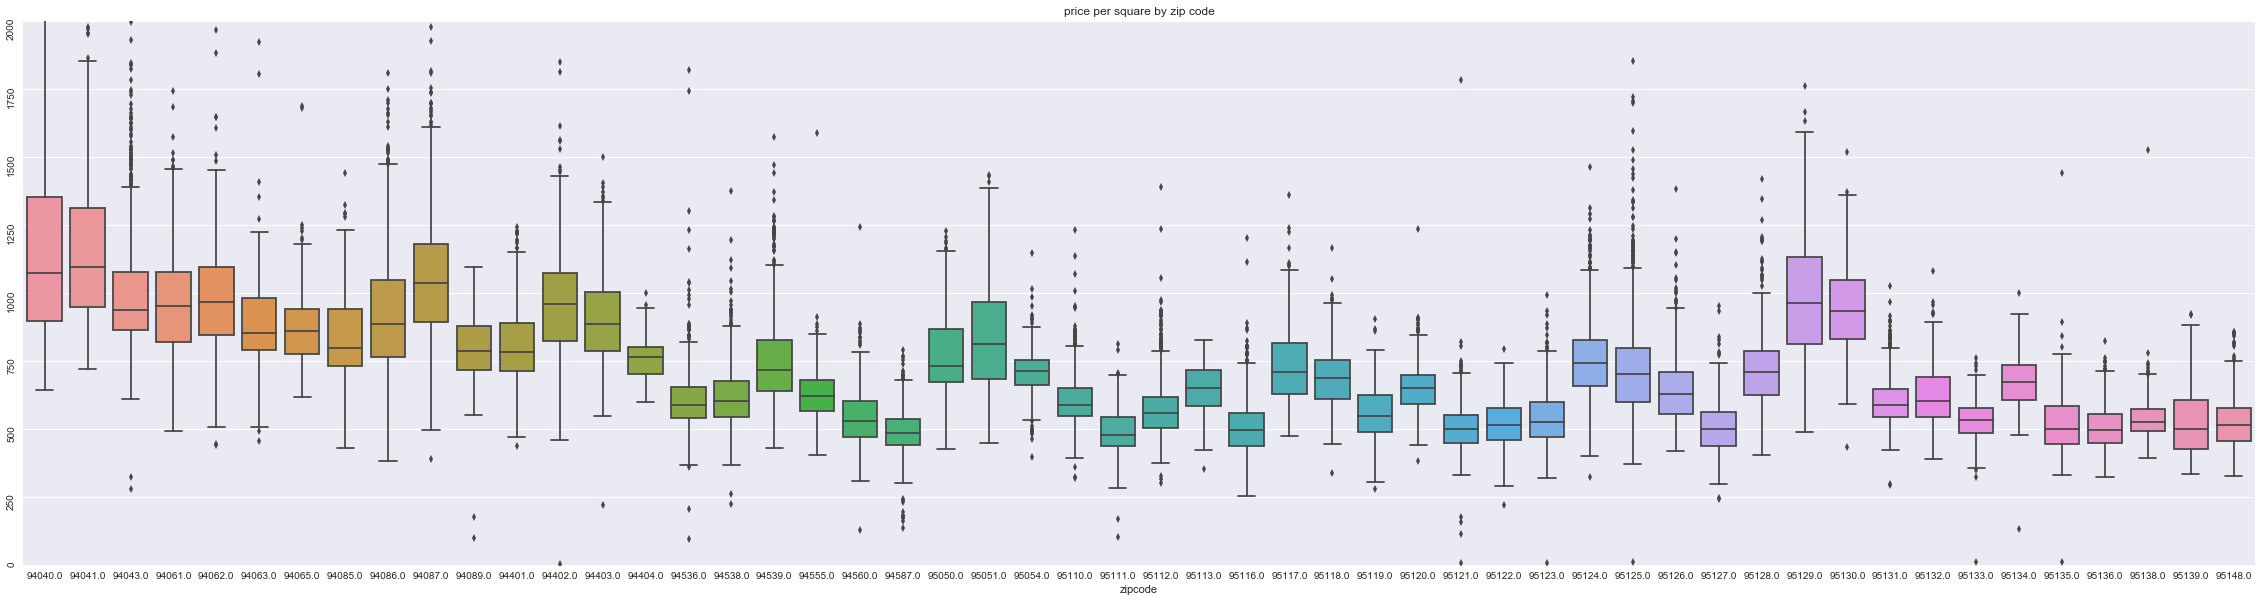

In [25]:
plt.figure(figsize=(40,10))
sns.boxplot(x=data.zipcode, y=data.Zestimate / data.sqft)
plt.yticks(rotation=90) 
plt.ylim(0,2000)
plt.title("price per square by zip code")

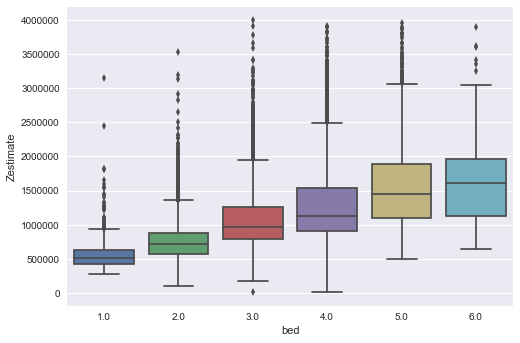

In [21]:
sns.boxplot(x=data.bed, y=data.Zestimate)

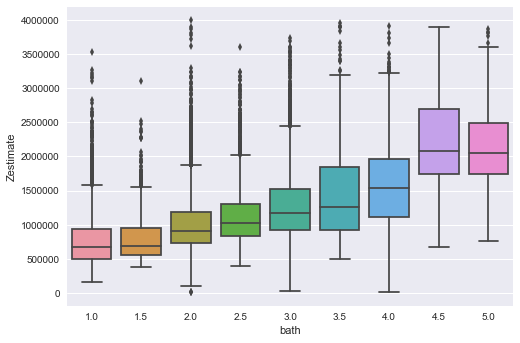

In [22]:
sns.boxplot(x=data.bath, y=data.Zestimate)